In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
os.listdir("/gdrive/MyDrive/RESULTATS TNT")

['Bases de données.xlsx',
 'Bases de données.csv',
 'Base_de_données_outliers.csv',
 'Base_de_données_standardisées.csv',
 'Base_de_données_SMOTE.csv',
 'Base_de_donnees_Augmentees.csv',
 'Base_de_donnees_pca_variables_uniques.csv']

In [ ]:
Data=pd.read_excel("/gdrive/MyDrive/RESULTATS TNT/Bases de données.xlsx")

In [ ]:
Data

,Ville,Altitude,Slope (°),Rugosité à la réception (m),Hauteur_Récepteur (m),Fréquence_(MHz),FSM,Température(°C),Humidité relative (%),Précipitation(mm),...,Type_Environnement,ID_Emetteur_Associe,Emetteur_Latitude,Emetteur_Longitude,Hauteur_Emetteur(m),Power_Tx(dBm),Distance_trajet_Emetteur-Récepteur(km),Nombre de batiment entre l'émission et la réception,Distance emetteur-dernier batiment(m),Visibilité directe bloquée
0,0,7,23.074382,7.399903,10,570,77.00,29.0,43,0.0,...,0,1,6.430200,2.347100,6.356997,21238,6.356997,4,953.162701,1
1,0,5,22.355982,7.166216,10,570,61.50,31.1,39,0.0,...,0,0,6.352268,2.402957,6.111417,21238,6.111417,33,973.187892,1
2,0,5,22.658038,7.241276,10,570,67.60,33.0,36,0.0,...,0,0,6.352268,2.402957,6.503809,21238,6.503809,34,975.067752,1
3,0,7,23.597164,7.621815,10,570,70.60,28.4,51,0.0,...,0,1,6.430200,2.347100,5.962326,21238,5.962326,6,958.696397,1
4,0,6,22.784896,7.314125,10,570,73.35,28.4,51,0.0,...,0,0,6.352268,2.402957,6.283724,21238,6.283724,28,950.584562,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1,285,57.446231,23.241646,10,538,77.70,28.4,37,0.0,...,1,2,11.123456,2.954658,6.065022,7079,6.065022,1,992.995741,1
350,1,287,57.423356,23.024153,10,538,78.50,28.4,37,0.0,...,1,2,11.123456,2.954658,5.560403,7079,5.560403,0,5560.402896,0
351,1,287,57.399402,23.069267,10,538,83.60,28.4,37,0.0,...,1,2,11.123456,2.954658,5.629393,7079,5.629393,0,5629.392781,0
352,1,292,57.317816,23.109159,10,538,83.30,28.4,37,0.0,...,1,2,11.123456,2.954658,5.636952,7079,5.636952,0,5636.952345,0


In [ ]:
Data.shape

(354, 25)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 25 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Ville                                                 354 non-null    int64  
 1   Altitude                                              354 non-null    int64  
 2   Slope (°)                                             354 non-null    float64
 3   Rugosité à la réception (m)                           354 non-null    float64
 4   Hauteur_Récepteur (m)                                 354 non-null    int64  
 5   Fréquence_(MHz)                                       354 non-null    int64  
 6   FSM                                                   354 non-null    float64
 7   Température(°C)                                       354 non-null    float64
 8   Humidité relative (%)                                 354 no

**NOMBRE DE VALEURS MANQUANTES DANS CHAQUE COLONNE**

In [ ]:
Data.isna().sum(axis=0)

,0
Ville,0
Altitude,0
Slope (°),0
Rugosité à la réception (m),0
Hauteur_Récepteur (m),0
Fréquence_(MHz),0
FSM,0
Température(°C),0
Humidité relative (%),0
Précipitation(mm),0


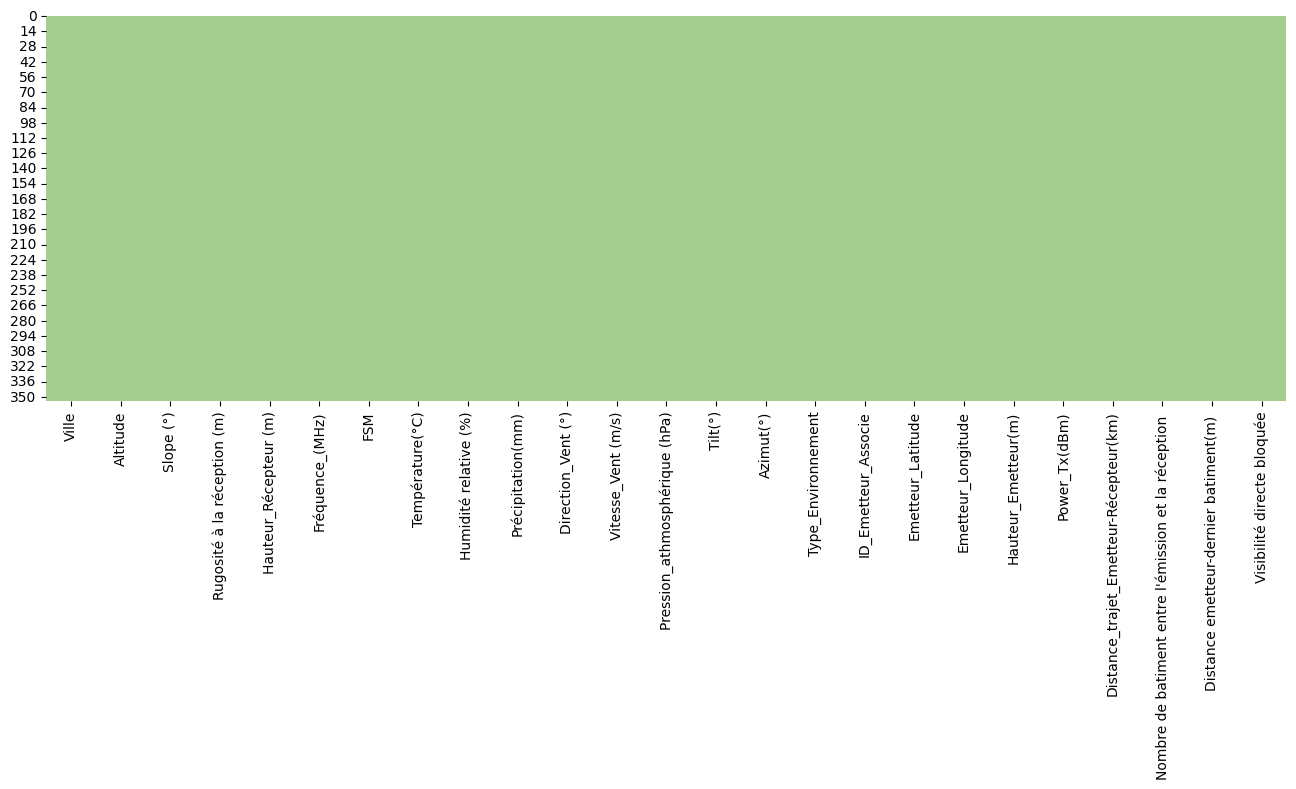

In [ ]:
plt.figure(figsize=(16,5))
sns.heatmap(Data.isna(),cmap="crest", cbar=False);

**PROPORTION DE DONNEES DANS CHAQUE VILLE**

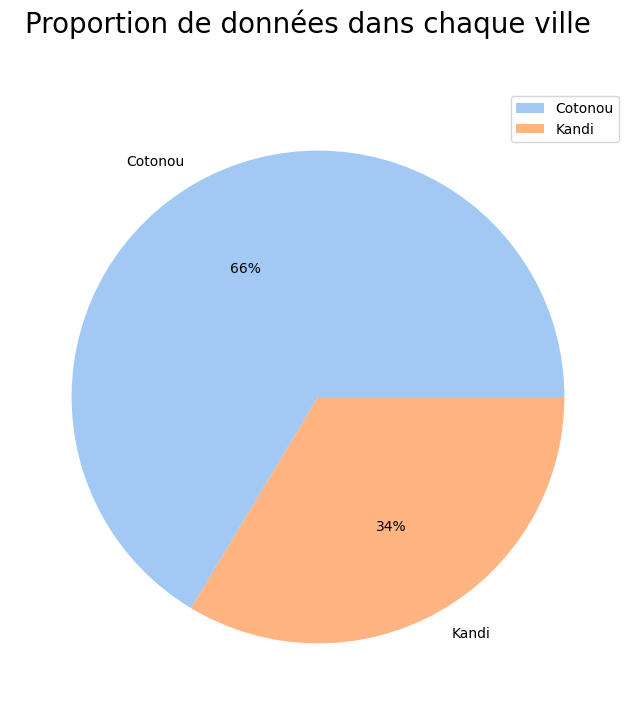

In [ ]:
plt.figure(figsize = (8,8)).suptitle('Proportion de données dans chaque ville', fontsize=20)
labels = ['Cotonou' if v == 0 else 'Kandi' for v in Data.Ville.value_counts().index]

#définir la palette de couleurs
colors = sns.color_palette('pastel')[0:5]

#créer un diagramme circulaire
plt.pie(Data.Ville.value_counts().values, labels=labels, colors=colors, autopct='%.0f%%')
plt.legend()
plt.show()

**GESTION DES OUTLIERS DANS LA BASE DE DONNEES**

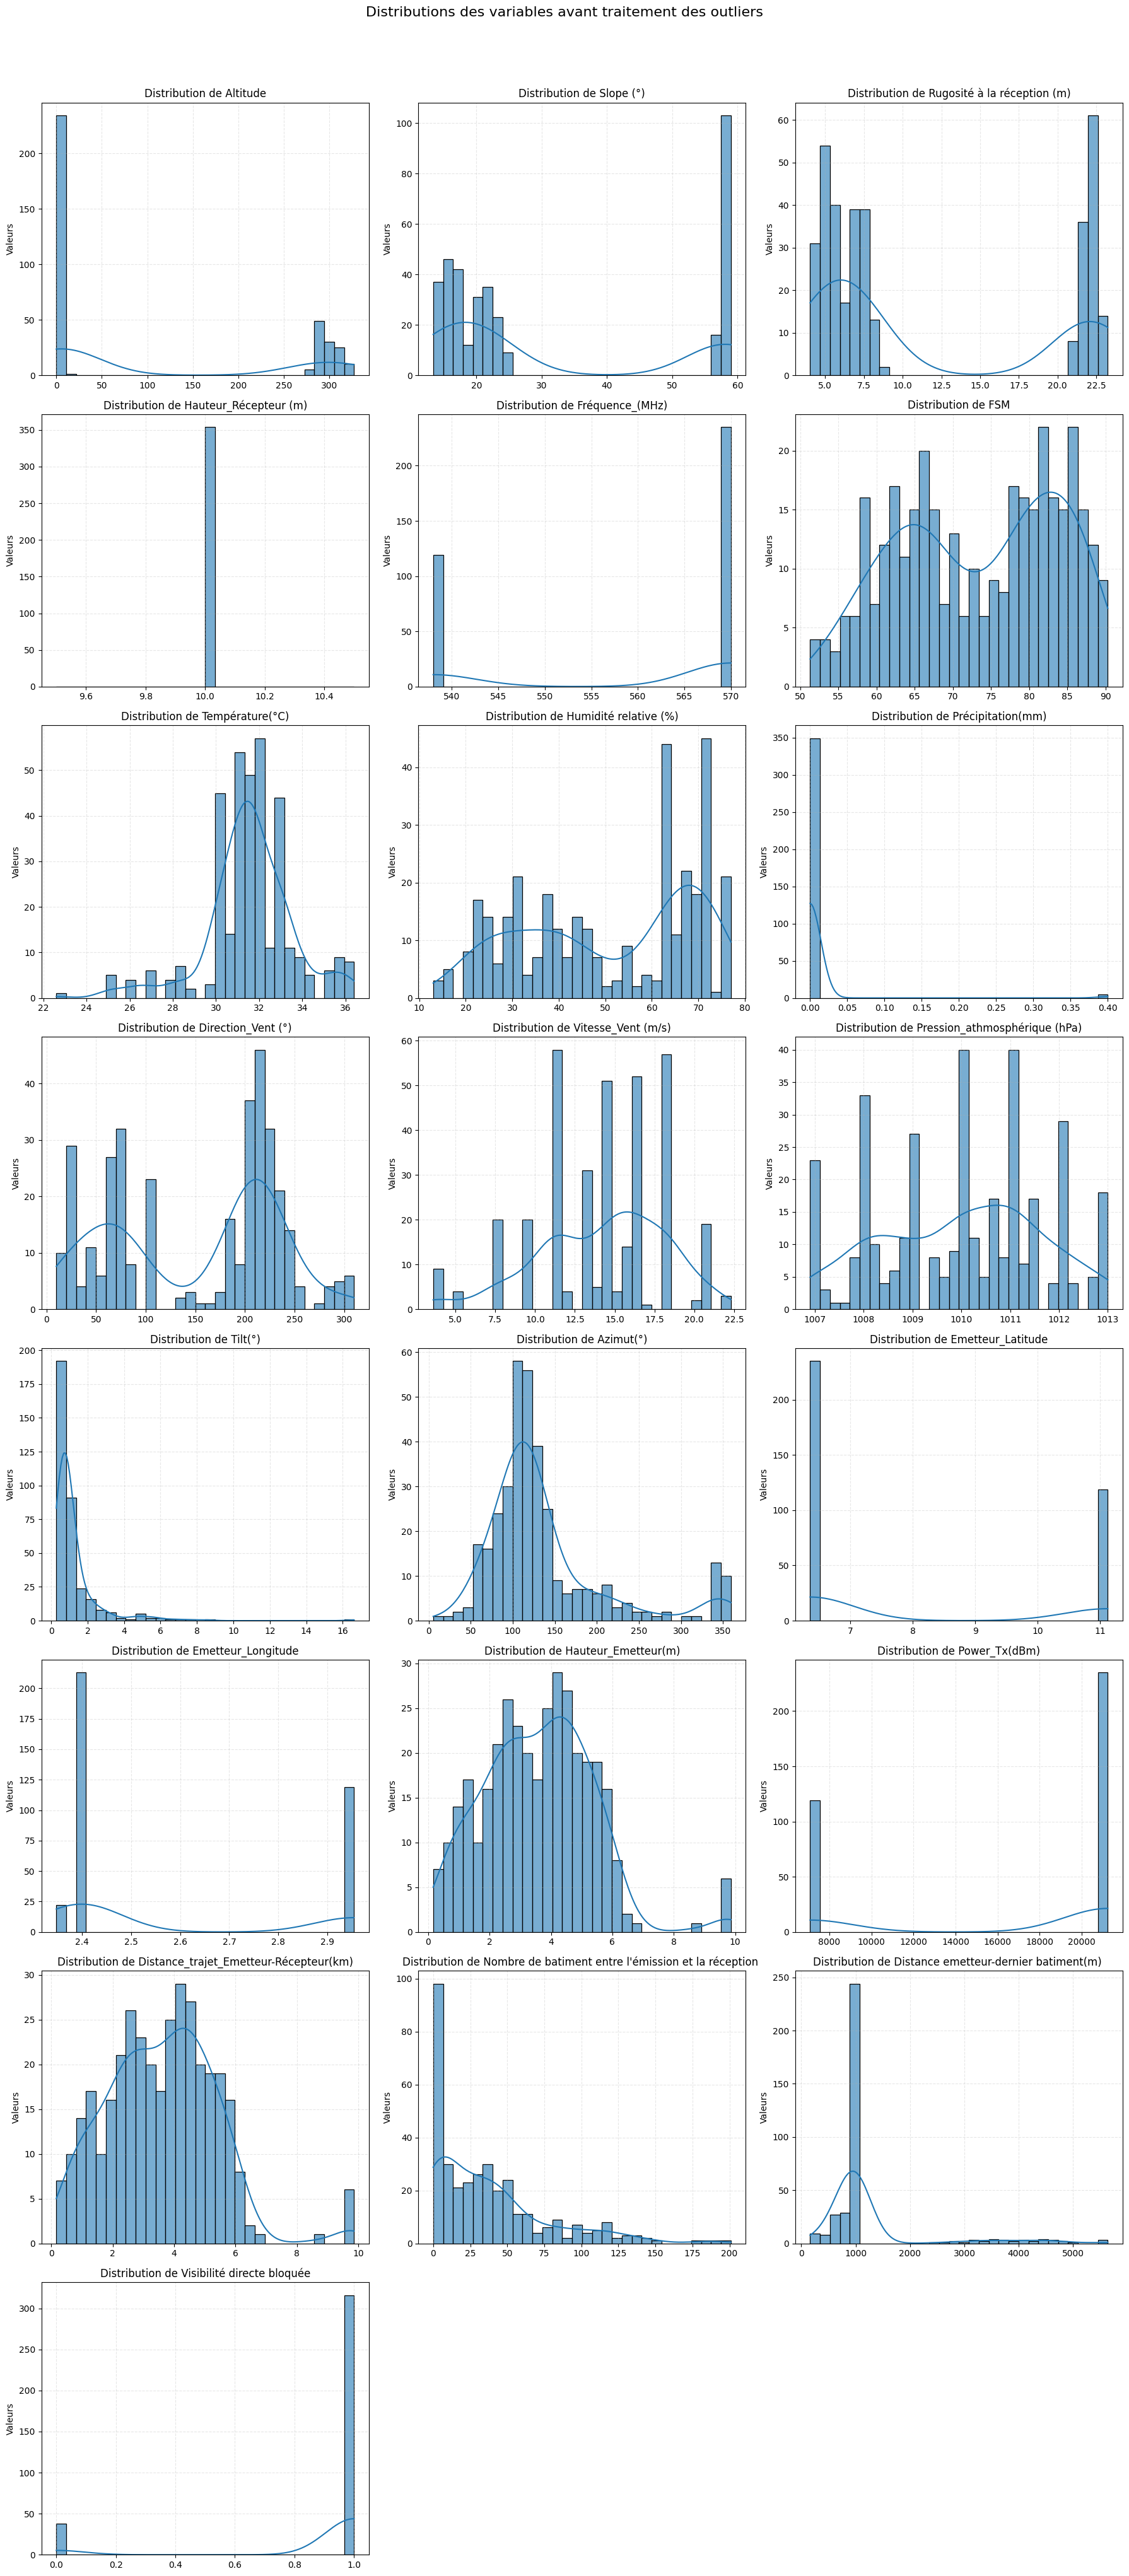

In [ ]:
# Variables à exclure
excluded_columns = ['Ville', 'ID_Emetteur_Associe', 'Type_Environnement']

# Sélection des colonnes numériques
numeric_cols = [col for col in Data.columns
                if col not in excluded_columns
                and pd.api.types.is_numeric_dtype(Data[col])]

# Calcul de la disposition
n_cols = 3  # Nombre de colonnes de graphiques
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Nombre de lignes nécessaires

# Création de la figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
fig.suptitle('Distributions des variables avant traitement des outliers', fontsize=16, y=1.02)

# Remplissage des graphiques
for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(Data[col], kde=True, ax=ax, bins=30, alpha=0.6)
    ax.set_title(f'Distribution de {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Valeurs')
    ax.grid(True, linestyle='--', alpha=0.3)

# Masquer les axes vides s'il y en a
for i in range(len(numeric_cols), n_rows * n_cols):
    axes.flatten()[i].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
Data_outliers = Data.copy()
# Colonnes à exclure du traitement
colonnes_exclues = ['Ville', 'ID_Emetteur_Associe', 'Type_Environnement']

# Colonnes numériques à traiter
colonnes_a_traiter = [col for col in Data_outliers.columns if col not in colonnes_exclues and pd.api.types.is_numeric_dtype(Data_outliers[col])]

# Appliquer le clipping selon les percentiles
for col in colonnes_a_traiter:
    lower_bound = Data_outliers[col].quantile(0.10)
    upper_bound = Data_outliers[col].quantile(0.90)
    Data_outliers[col] = Data_outliers[col].clip(lower=lower_bound, upper=upper_bound)

# Sauvegarder le résultat si besoin
Data_outliers.to_csv("Base_de_données_outliers.csv", index=False)

In [ ]:
chemin_fichier = '/gdrive/MyDrive/RESULTATS TNT/Base_de_données_outliers.csv'
Data_outliers.to_csv(chemin_fichier, index=False)

In [ ]:
Data_1=pd.read_csv("/gdrive/MyDrive/RESULTATS TNT/Base_de_données_outliers.csv")

In [ ]:
Data_1

,Ville,Altitude,Slope (°),Rugosité à la réception (m),Hauteur_Récepteur (m),Fréquence_(MHz),FSM,Température(°C),Humidité relative (%),Précipitation(mm),...,Type_Environnement,ID_Emetteur_Associe,Emetteur_Latitude,Emetteur_Longitude,Hauteur_Emetteur(m),Power_Tx(dBm),Distance_trajet_Emetteur-Récepteur(km),Nombre de batiment entre l'émission et la réception,Distance emetteur-dernier batiment(m),Visibilité directe bloquée
0,0,7.0,23.074382,7.399903,10,570,77.00,30.0,43.0,0.0,...,0,1,6.430200,2.402957,5.634684,21238,5.634684,4.0,953.162701,1
1,0,5.0,22.355982,7.166216,10,570,61.50,31.1,39.0,0.0,...,0,0,6.352268,2.402957,5.634684,21238,5.634684,33.0,973.187892,1
2,0,5.0,22.658038,7.241276,10,570,67.60,33.0,36.0,0.0,...,0,0,6.352268,2.402957,5.634684,21238,5.634684,34.0,975.067752,1
3,0,7.0,23.597164,7.621815,10,570,70.60,30.0,51.0,0.0,...,0,1,6.430200,2.402957,5.634684,21238,5.634684,6.0,958.696397,1
4,0,6.0,22.784896,7.314125,10,570,73.35,30.0,51.0,0.0,...,0,0,6.352268,2.402957,5.634684,21238,5.634684,28.0,950.584562,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1,285.0,57.446231,22.352817,10,538,77.70,30.0,37.0,0.0,...,1,2,11.123456,2.954658,5.634684,7079,5.634684,1.0,992.995741,1
350,1,287.0,57.423356,22.352817,10,538,78.50,30.0,37.0,0.0,...,1,2,11.123456,2.954658,5.560403,7079,5.560403,0.0,2602.268976,0
351,1,287.0,57.399402,22.352817,10,538,83.60,30.0,37.0,0.0,...,1,2,11.123456,2.954658,5.629393,7079,5.629393,0.0,2602.268976,0
352,1,292.0,57.317816,22.352817,10,538,83.30,30.0,37.0,0.0,...,1,2,11.123456,2.954658,5.634684,7079,5.634684,0.0,2602.268976,0


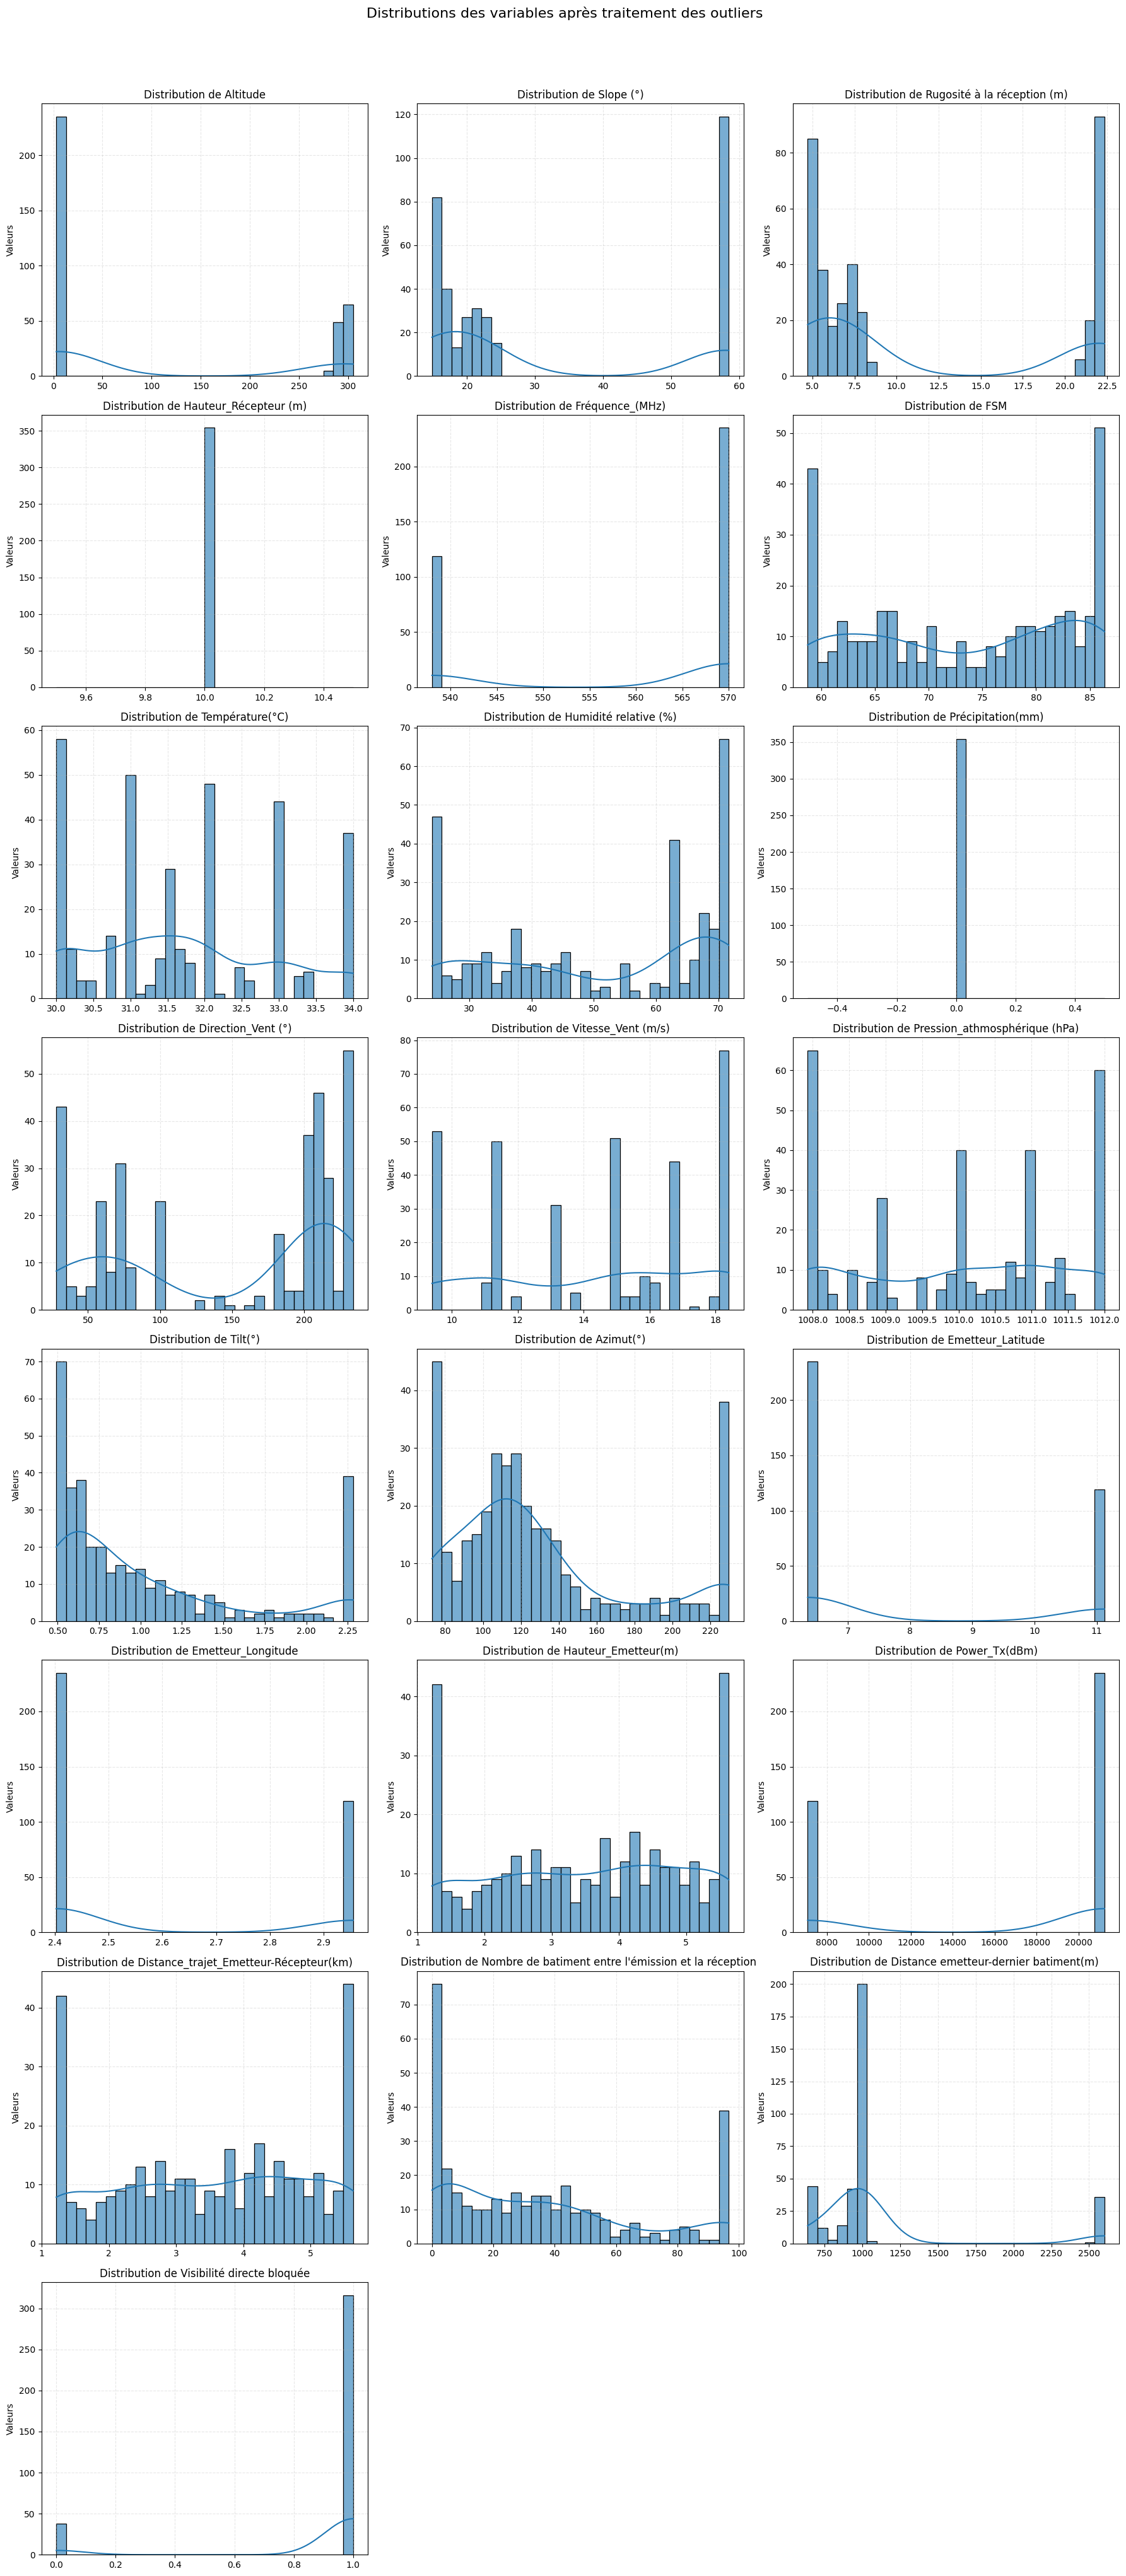

In [ ]:
# Variables à exclure
excluded_columns = ['Ville', 'ID_Emetteur_Associe', 'Type_Environnement']

# Sélection des colonnes numériques
numeric_cols = [col for col in Data_1.columns
                if col not in excluded_columns
                and pd.api.types.is_numeric_dtype(Data_1[col])]

# Calcul de la disposition
n_cols = 3  # Nombre de colonnes de graphiques
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Nombre de lignes nécessaires

# Création de la figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
fig.suptitle('Distributions des variables après traitement des outliers', fontsize=16, y=1.02)

# Remplissage des graphiques
for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(Data_1[col], kde=True, ax=ax, bins=30, alpha=0.6)
    ax.set_title(f'Distribution de {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Valeurs')
    ax.grid(True, linestyle='--', alpha=0.3)

# Masquer les axes vides s'il y en a
for i in range(len(numeric_cols), n_rows * n_cols):
    axes.flatten()[i].set_visible(False)

plt.tight_layout()
plt.show()

**STANDARDISATION DE LA BASE DE DONNEES AVEC Z-SCORE**

In [ ]:
# Liste des colonnes à exclure de la standardisation
colonnes_a_exclure = ['Ville', 'ID_Emetteur_Associe', 'Type_Environnement']

# Sélectionner les colonnes à standardiser (tout sauf les colonnes à exclure)
colonnes_a_standardiser = [col for col in Data_1.columns if col not in colonnes_a_exclure]

# Appliquer la standardisation (Z-score) aux colonnes sélectionnées
scaler = StandardScaler()
Data_1[colonnes_a_standardiser] = scaler.fit_transform(Data_1[colonnes_a_standardiser])

# Sauvegarde des données standardisées dans Drive
chemin_sortie = '/gdrive/MyDrive/RESULTATS TNT/Base_de_données_standardisées.csv'
Data_1.to_csv(chemin_sortie, index=False)

print("Données standardisées avec Z-score sauvegardées dans :", chemin_sortie)


Données standardisées avec Z-score sauvegardées dans : /gdrive/MyDrive/RESULTATS TNT/Base_de_données_standardisées.csv


In [ ]:
Data_Standardisées=pd.read_csv("/gdrive/MyDrive/RESULTATS TNT/Base_de_données_standardisées.csv")

In [ ]:
Data_Standardisées

,Ville,Altitude,Slope (°),Rugosité à la réception (m),Hauteur_Récepteur (m),Fréquence_(MHz),FSM,Température(°C),Humidité relative (%),Précipitation(mm),...,Type_Environnement,ID_Emetteur_Associe,Emetteur_Latitude,Emetteur_Longitude,Hauteur_Emetteur(m),Power_Tx(dBm),Distance_trajet_Emetteur-Récepteur(km),Nombre de batiment entre l'émission et la réception,Distance emetteur-dernier batiment(m),Visibilité directe bloquée
0,0,-0.701604,-0.463373,-0.533909,0.0,0.711606,0.364734,-1.349914,-0.440079,0.0,...,0,1,-0.680195,-0.711606,1.455445,0.711606,1.455445,-0.962867,-0.275438,0.346775
1,0,-0.716171,-0.501523,-0.564751,0.0,0.711606,-1.224730,-0.474986,-0.665843,0.0,...,0,0,-0.714824,-0.711606,1.455445,0.711606,1.455445,-0.040193,-0.237428,0.346775
2,0,-0.716171,-0.485483,-0.554845,0.0,0.711606,-0.599199,1.036252,-0.835165,0.0,...,0,0,-0.714824,-0.711606,1.455445,0.711606,1.455445,-0.008377,-0.233860,0.346775
3,0,-0.701604,-0.435612,-0.504620,0.0,0.711606,-0.291561,-1.349914,0.011448,0.0,...,0,1,-0.680195,-0.711606,1.455445,0.711606,1.455445,-0.899234,-0.264934,0.346775
4,0,-0.708887,-0.478746,-0.545230,0.0,0.711606,-0.009559,-1.349914,0.011448,0.0,...,0,0,-0.714824,-0.711606,1.455445,0.711606,1.455445,-0.199275,-0.280331,0.346775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1,1.323260,1.361907,1.439618,0.0,-1.405272,0.436516,-1.349914,-0.778724,0.0,...,1,2,1.405225,1.405272,1.455445,-1.405272,1.455445,-1.058316,-0.199831,0.346775
350,1,1.337827,1.360692,1.439618,0.0,-1.405272,0.518553,-1.349914,-0.778724,0.0,...,1,2,1.405225,1.405272,1.404348,-1.405272,1.404348,-1.090132,2.854701,-2.883711
351,1,1.337827,1.359420,1.439618,0.0,-1.405272,1.041537,-1.349914,-0.778724,0.0,...,1,2,1.405225,1.405272,1.451805,-1.405272,1.451805,-1.090132,2.854701,-2.883711
352,1,1.374246,1.355088,1.439618,0.0,-1.405272,1.010773,-1.349914,-0.778724,0.0,...,1,2,1.405225,1.405272,1.455445,-1.405272,1.455445,-1.090132,2.854701,-2.883711


**GENERATION DES DONNEES PAR SMOTE POUR EQUILIBRER LES CLASSES**

In [ ]:
# Séparation des features (X) et de la cible (y)
X = Data_Standardisées.drop(columns=['Ville'])
y = Data_Standardisées['Ville']  # 0 = Cotonou, 1 = Kandi

# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Reconstituer le DataFrame équilibré
Data_SMOTE = pd.DataFrame(X_resampled, columns=X.columns)
Data_SMOTE['Ville'] = y_resampled

# Sauvegarde dans Drive
chemin_sortie = '/gdrive/MyDrive/RESULTATS TNT/Base_de_données_SMOTE.csv'
Data_SMOTE.to_csv(chemin_sortie, index=False)

print("Données équilibrées avec SMOTE sauvegardées dans :", chemin_sortie)
Data_SMOTE['Ville'].value_counts()

Données équilibrées avec SMOTE sauvegardées dans : /gdrive/MyDrive/RESULTATS TNT/Base_de_données_SMOTE.csv


,count
Ville,
0,235
1,235


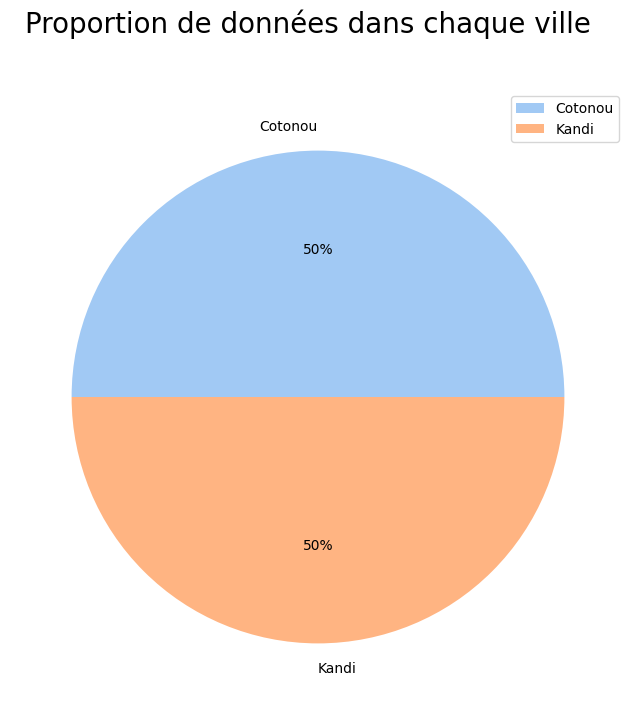

In [ ]:
Data_Equilibrées=pd.read_csv("/gdrive/MyDrive/RESULTATS TNT/Base_de_données_SMOTE.csv")
plt.figure(figsize = (8,8)).suptitle('Proportion de données dans chaque ville', fontsize=20)
labels = ['Cotonou' if v == 0 else 'Kandi' for v in Data_Equilibrées.Ville.value_counts().index]

#définir la palette de couleurs
colors = sns.color_palette('pastel')[0:5]

#créer un diagramme circulaire
plt.pie(Data_Equilibrées.Ville.value_counts().values, labels=labels, colors=colors, autopct='%.0f%%')
plt.legend()
plt.show()

In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/66

In [ ]:
!pip install sdv --upgrade

  Using cached sdv-1.19.0-py3-none-any.whl.metadata (14 kB)
  Using cached boto3-1.37.33-py3-none-any.whl.metadata (6.7 kB)
  Using cached botocore-1.37.33-py3-none-any.whl.metadata (5.7 kB)
  Using cached copulas-0.12.2-py3-none-any.whl.metadata (9.4 kB)
  Using cached ctgan-0.11.0-py3-none-any.whl.metadata (10 kB)
  Using cached deepecho-0.7.0-py3-none-any.whl.metadata (10 kB)
  Using cached rdt-1.16.0-py3-none-any.whl.metadata (10 kB)
  Using cached sdmetrics-0.20.0-py3-none-any.whl.metadata (9.4 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached s3transfer-0.11.4-py3-none-any.whl.metadata (1.7 kB)
  Using cached faker-37.1.0-py3-none-any.whl.metadata (15 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 k

In [ ]:
!pip install ctgan

In [ ]:
!pip install --upgrade ctgan

**AUGMENTATION DE 1000 ECHANTILLONS DE LA BASE DE DONNEES**

In [ ]:
from ctgan import CTGAN

In [ ]:
# 1. Paramétrage CTGAN optimisé CPU
ctgan = CTGAN(
    epochs=500,
    batch_size=500,
    verbose=True,
    cuda=False,
    generator_dim=(256, 256),
    discriminator_dim=(256, 256)
)

# 2. Colonnes discrètes (encodées)
discrete_cols = ['Ville', 'ID_Emetteur_Associe', 'Type_Environnement']

# 3. Entraînement
ctgan.fit(Data_Equilibrées, discrete_columns=discrete_cols)

# 4. Génération synthétique avec vérification
synthetic_data = pd.DataFrame()
needed = 500

while True:
    # Génère un gros batch de données synthétiques
    new_data = ctgan.sample(2000)
    synthetic_data = pd.concat([synthetic_data, new_data], ignore_index=True)

    count_cotonou = (synthetic_data['Ville'] == 0).sum()
    count_kandi = (synthetic_data['Ville'] == 1).sum()

    print(f"Actuellement générés — Cotonou: {count_cotonou}, Kandi: {count_kandi}")

    if count_cotonou >= needed and count_kandi >= needed:
        break

# 5. Sélection des 500 meilleurs pour chaque classe
synthetic_cotonou = synthetic_data[synthetic_data['Ville'] == 0].head(500)
synthetic_kandi = synthetic_data[synthetic_data['Ville'] == 1].head(500)

# 6. Fusion avec données originales
Data_Augmentees = pd.concat([Data_Equilibrées, synthetic_cotonou, synthetic_kandi], ignore_index=True)

# 7. Vérification
print("Taille finale:", len(Data_Augmentees))
print("Répartition Ville (0=Cotonou, 1=Kandi):\n", Data_Augmentees['Ville'].value_counts())

# 8. Sauvegarde
Data_Augmentees.to_csv('/gdrive/MyDrive/RESULTATS TNT/Base_de_donnees_Augmentees.csv', index=False)


Gen. (-1.49) | Discrim. (-0.45): 100%|██████████| 500/500 [01:02<00:00,  7.96it/s]


Actuellement générés — Cotonou: 1034, Kandi: 966
Taille finale: 1470
Répartition Ville (0=Cotonou, 1=Kandi):
 Ville
0    735
1    735
Name: count, dtype: int64


**VISUALISATION DE DISTRIBUTION DES DONNEES**

In [ ]:
import numpy as np
Data_Final=pd.read_csv("/gdrive/MyDrive/RESULTATS TNT/Base_de_donnees_Augmentees.csv")

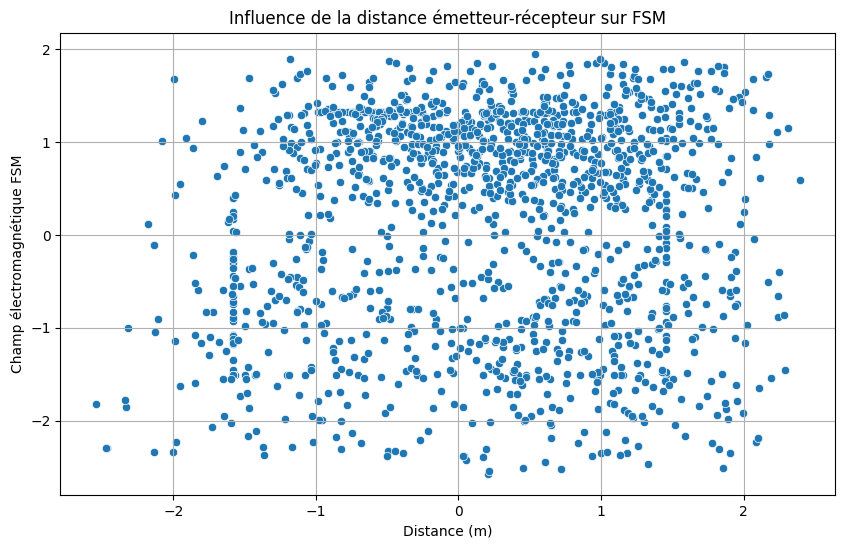

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data_Final, x='Distance_trajet_Emetteur-Récepteur(km)', y='FSM')
plt.title("Influence de la distance émetteur-récepteur sur FSM")
plt.xlabel("Distance (m)")
plt.ylabel("Champ électromagnétique FSM")
plt.grid(True)
plt.show()

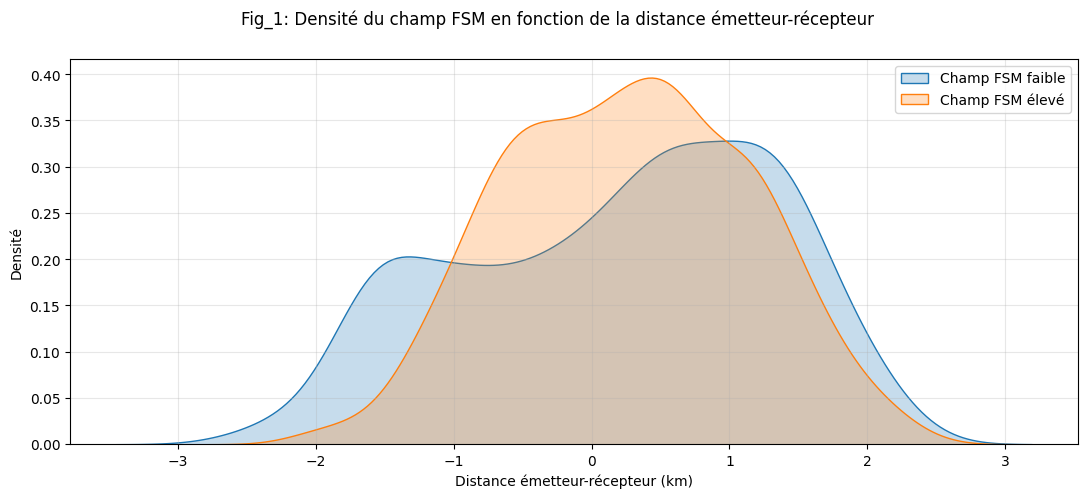

In [ ]:
plt.figure(figsize=(13, 5))
plt.suptitle('Fig_1: Densité du champ FSM en fonction de la distance émetteur-récepteur', fontsize=12)

# Séparation des données en deux groupes (exemple avec un seuil arbitraire pour FSM)
seuil_fsm = Data_Final['FSM'].median()  # Vous pouvez ajuster ce seuil

# KDE Plot pour les faibles vs forts champs FSM
sns.kdeplot(data=Data_Final[Data_Final['FSM'] < seuil_fsm]['Distance_trajet_Emetteur-Récepteur(km)'],
            label='Champ FSM faible', fill=True)
sns.kdeplot(data=Data_Final[Data_Final['FSM'] >= seuil_fsm]['Distance_trajet_Emetteur-Récepteur(km)'],
            label='Champ FSM élevé', fill=True)

plt.xlabel('Distance émetteur-récepteur (km)')
plt.ylabel('Densité')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

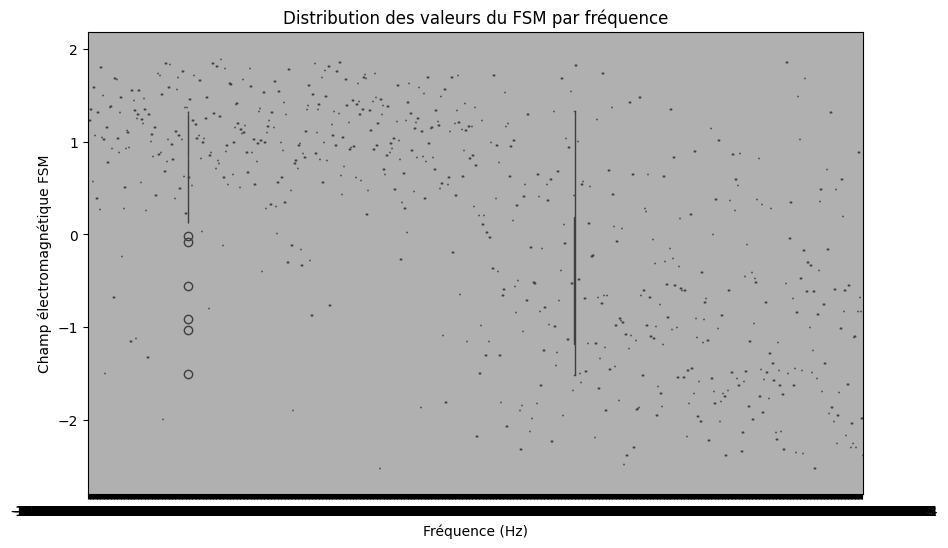

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data_Final, x='Fréquence_(MHz)', y='FSM')
plt.title("Distribution des valeurs du FSM par fréquence")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Champ électromagnétique FSM")
plt.grid(True)
plt.show()

**CORRELATION ENTRE LES VARIABLES**

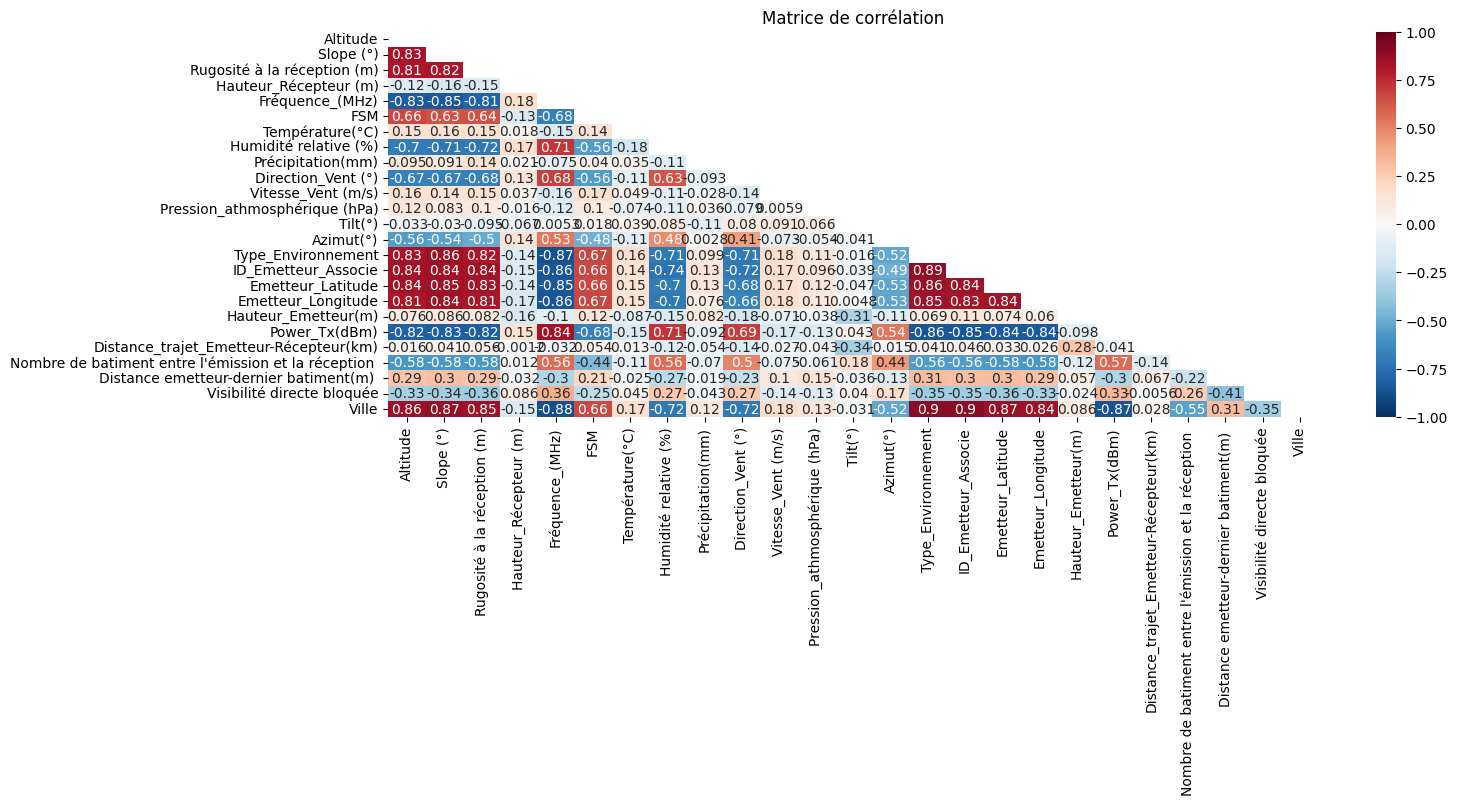

In [ ]:
plt.figure(figsize=(15, 5))
corr = Data_Final.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap='RdBu_r', annot=True, vmin=-1.0, vmax=1.0, center=0)
plt.title("Matrice de corrélation")
plt.show()


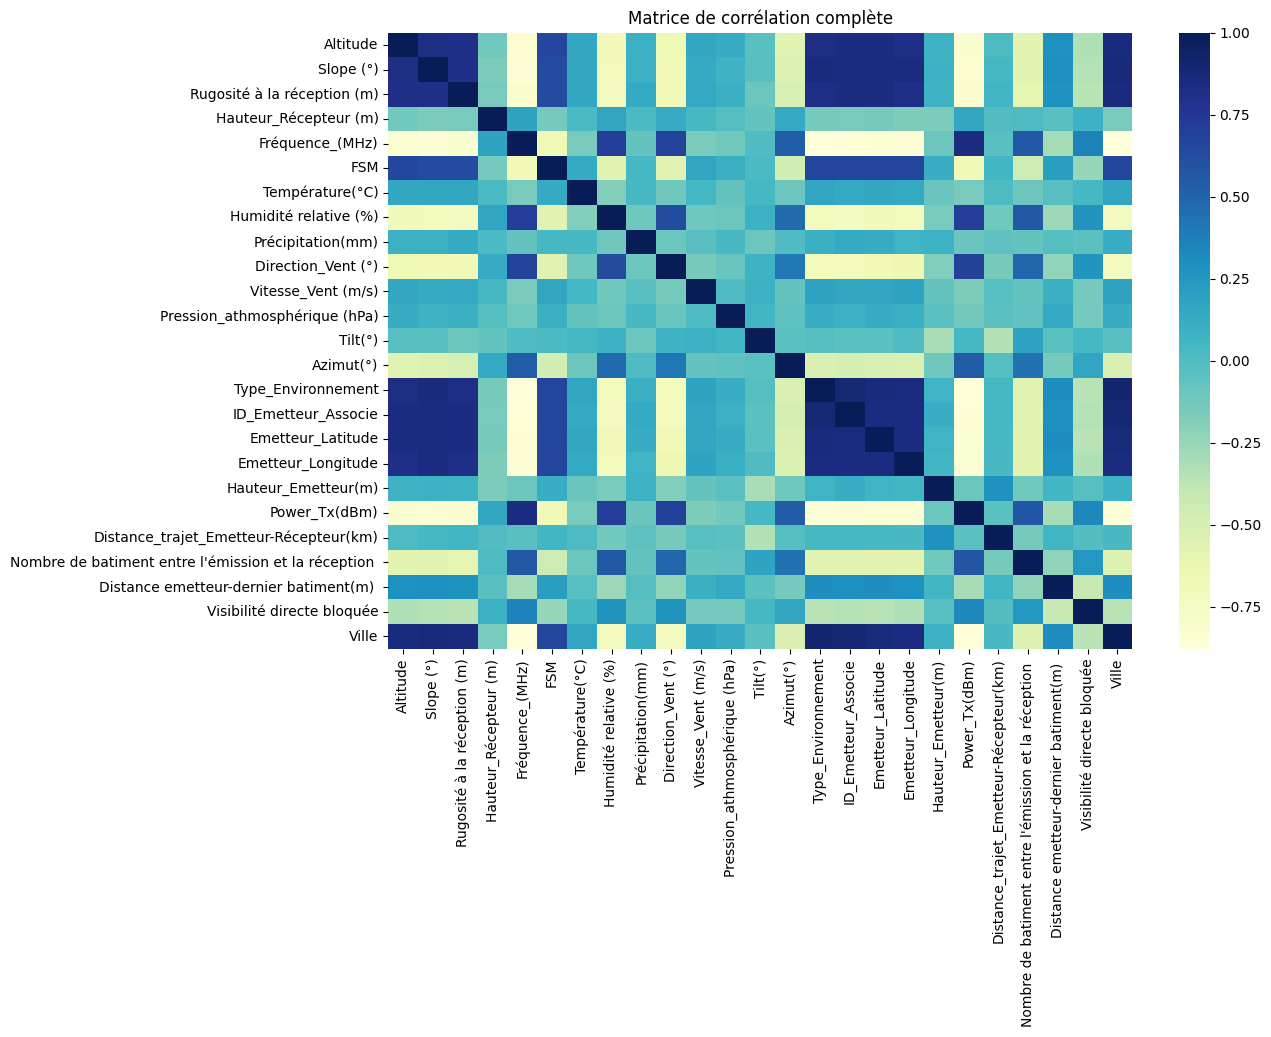

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(Data_Final.corr(numeric_only=True), cmap="YlGnBu")
plt.title("Matrice de corrélation complète")
plt.show()


**MATRICE DE CORRELATION ENTRE LA VARIABLE CIBLE FSM ET LES VARIABLES NUMERIQUES**

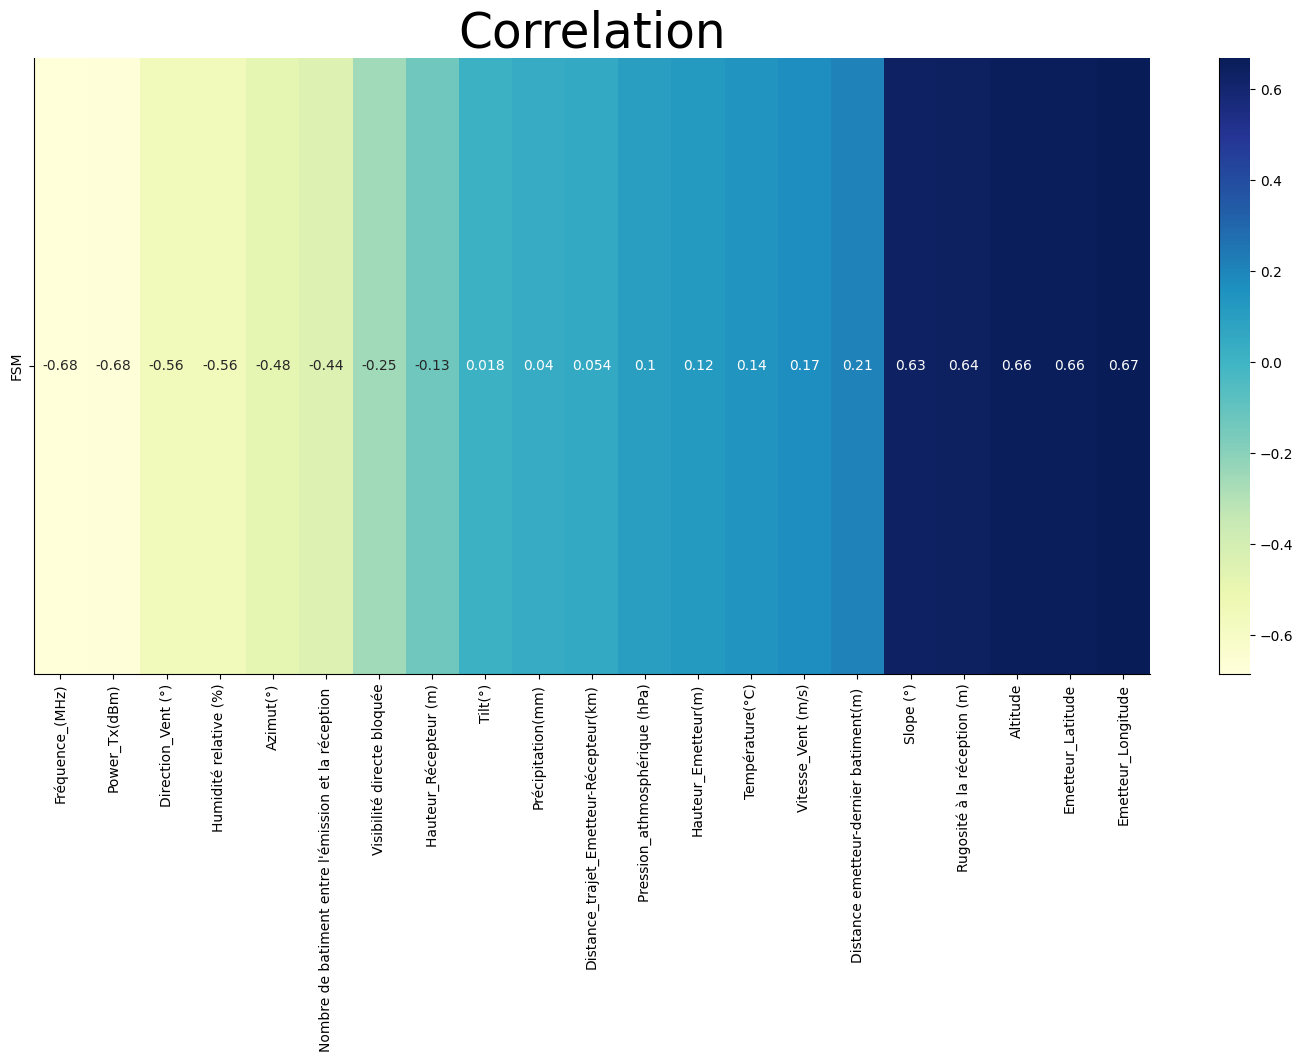

In [ ]:
plt.figure(figsize=(18, 8))

# Calcul de la corrélation en excluant les colonnes spécifiées
fsm_corr = Data_Final.drop(columns=['Ville', 'Type_Environnement', 'ID_Emetteur_Associe']).corr(numeric_only=True)['FSM'].drop('FSM').sort_values()

sns.heatmap(fsm_corr.to_frame().T, cmap="YlGnBu", annot=True)
plt.title("Correlation", fontsize=35)
sns.despine()
plt.show()

**MATRICE DE CORRELATION ENTRE LA VARIABLE CIBLE FSM ET LES VARIABLES CATEGORIELLES**

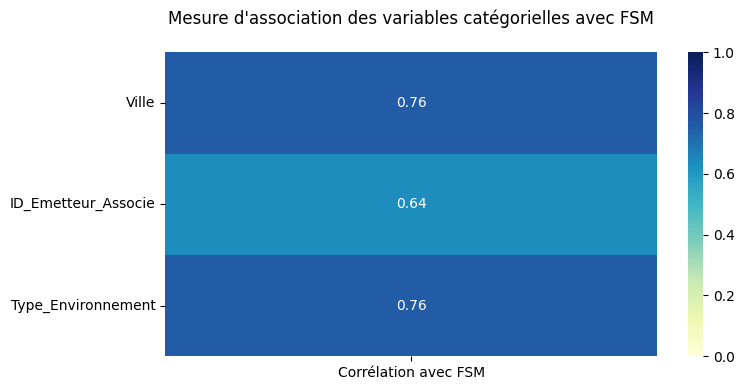

In [ ]:
from scipy.stats import pointbiserialr, f_oneway
categorical_vars = ['Ville', 'ID_Emetteur_Associe', 'Type_Environnement']
correlations = {}

for col in categorical_vars:
    # Solution 1: Correlation ratio pour variables catégorielles/continues
    groups = Data_Final.groupby(col)['FSM'].apply(list)
    eta_squared = f_oneway(*groups)[0] / (f_oneway(*groups)[0] + sum(len(g)*(np.mean(g)-np.mean(Data_Final['FSM']))**2 for g in groups))
    correlations[col] = np.sqrt(eta_squared)

    # Alternative si préférée: Encodage numérique temporaire
    # temp_df = Data_Final[[col, 'FSM']].copy()
    # temp_df[col] = pd.factorize(temp_df[col])[0]
    # correlations[col] = temp_df.corr().iloc[0,1]

corr_cat_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Corrélation avec FSM'])

plt.figure(figsize=(8, 4))
sns.heatmap(corr_cat_df, annot=True, cmap="YlGnBu", vmin=0, vmax=1, fmt=".2f")
plt.title("Mesure d'association des variables catégorielles avec FSM", pad=20)
plt.tight_layout()
plt.show()


**LISTES DES VARIABLES LES PLUS CORRELEES A LA VARIABLE CIBLE FSM**

In [ ]:
corr_with_FSM = Data_Final.corr()['FSM'].abs().sort_values(ascending=False)
top_corr_vars = corr_with_FSM.index[1:25]  # [1:] pour exclure FSM lui-même
print("Variables les plus corrélées avec FSM :")
print(top_corr_vars.tolist())


Variables les plus corrélées avec FSM :
['Fréquence_(MHz)', 'Power_Tx(dBm)', 'Emetteur_Longitude', 'Type_Environnement', 'ID_Emetteur_Associe', 'Ville', 'Emetteur_Latitude', 'Altitude', 'Rugosité à la réception (m)', 'Slope (°)', 'Direction_Vent (°)', 'Humidité relative (%)', 'Azimut(°)', "Nombre de batiment entre l'émission et la réception ", 'Visibilité directe bloquée', 'Distance emetteur-dernier batiment(m) ', 'Vitesse_Vent (m/s)', 'Température(°C)', 'Hauteur_Récepteur (m)', 'Hauteur_Emetteur(m)', 'Pression_athmosphérique (hPa)', 'Distance_trajet_Emetteur-Récepteur(km)', 'Précipitation(mm)', 'Tilt(°)']


**SELECTION DES VARIABLES AVEC PCA**

In [ ]:
from sklearn.decomposition import PCA

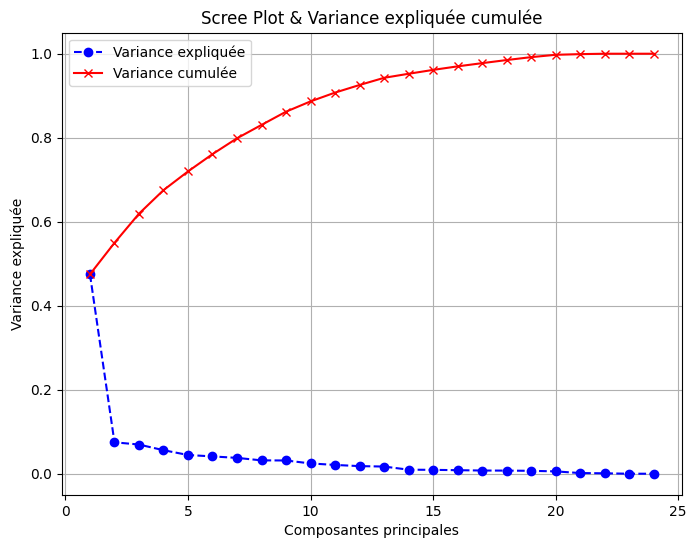

Variance cumulée pour chaque composante :
[0.47482523 0.54966592 0.61912421 0.67514154 0.71972947 0.76092824
 0.79865631 0.83046267 0.86199087 0.88648643 0.90741799 0.92552506
 0.94260628 0.9522431  0.96146036 0.96988857 0.97751266 0.98491507
 0.99184125 0.99740229 0.99901945 0.99999987 0.99999994 1.        ]


In [ ]:
# Appliquer PCA sur les données standardisées
pca = PCA()
X_scaled = Data_Final.drop(columns=['FSM'])  # On suppose que les données sont déjà standardisées
pca.fit(X_scaled)

# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

# Variance expliquée cumulée
cumulative_variance = explained_variance.cumsum()

# Créer le scree plot
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b', label='Variance expliquée')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='x', linestyle='-', color='r', label='Variance cumulée')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.title('Scree Plot & Variance expliquée cumulée')
plt.legend()
plt.grid(True)
plt.show()

# Afficher la variance cumulée pour chaque composante
print("Variance cumulée pour chaque composante :")
print(cumulative_variance)


In [ ]:
# 1. Séparer les variables explicatives et la cible
X = Data_Final.drop(columns=['FSM'])
y = Data_Final['FSM']

# 2. Appliquer PCA avec n_components=21
pca = PCA(n_components=21)
X_pca = pca.fit_transform(X)

# 3. Calculer les loadings
loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(21)])

# 4. Identifier les variables les plus contributives (uniques)
top_variables = []
for i in range(21):
    var = loadings.iloc[:, i].abs().idxmax()
    if var not in top_variables:
        top_variables.append(var)
    if len(top_variables) == 21:
        break

# 5. Créer un DataFrame avec ces variables issues de la base originale
Data_pca_unique = Data_Final[top_variables].copy()
Data_pca_unique['FSM'] = y

# 6. Sauvegarde du fichier CSV
output_path = '/gdrive/MyDrive/RESULTATS TNT/Base_de_donnees_pca_variables_uniques.csv'
Data_pca_unique.to_csv(output_path, index=False)

print("Variables uniques les plus contributives conservées :")
print(top_variables)
print(f"\nFichier sauvegardé dans : {output_path}")

Variables uniques les plus contributives conservées :
['Slope (°)', 'Température(°C)', 'Hauteur_Emetteur(m)', 'Pression_athmosphérique (hPa)', 'Azimut(°)', 'Vitesse_Vent (m/s)', 'Distance emetteur-dernier batiment(m) ', "Nombre de batiment entre l'émission et la réception ", 'Humidité relative (%)', 'Direction_Vent (°)', 'Altitude', 'Rugosité à la réception (m)', 'Power_Tx(dBm)', 'Emetteur_Latitude', 'Fréquence_(MHz)', 'ID_Emetteur_Associe', 'Type_Environnement']

Fichier sauvegardé dans : /gdrive/MyDrive/RESULTATS TNT/Base_de_donnees_pca_variables_uniques.csv


In [ ]:
# 1. Séparer les variables explicatives et la cible
X = Data_Final.drop(columns=['FSM'])
y = Data_Final['FSM']

# 2. Variables les plus corrélées avec FSM
corr_with_FSM = Data_Final.corr()['FSM'].abs().sort_values(ascending=False)
top_corr_vars = corr_with_FSM.index[1:22]  # Exclut FSM lui-même
print("✅ Variables les plus corrélées avec FSM :")
print(top_corr_vars.tolist())

# 3. PCA : calcul des variables les plus contributives
pca = PCA(n_components=21)
X_pca = pca.fit_transform(X)
loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(21)])

top_pca_vars = []
for i in range(21):
    var = loadings.iloc[:, i].abs().idxmax()
    if var not in top_pca_vars:
        top_pca_vars.append(var)
    if len(top_pca_vars) == 21:
        break

print("\n✅ Variables les plus contributives selon PCA :")
print(top_pca_vars)

# 4. Fusion des deux listes sans doublons
fusion_vars = list(set(top_corr_vars).union(set(top_pca_vars)))
print(f"\n✅ Fusion des variables (corrélation ∪ PCA) : {len(fusion_vars)} variables")
print(fusion_vars)

# 5. Variables communes (intersection) — avec complétion si < 21
common_vars = list(set(top_corr_vars).intersection(set(top_pca_vars)))

if len(common_vars) < 21:
    remaining_corr = [var for var in top_corr_vars if var not in common_vars]
    remaining_pca = [var for var in top_pca_vars if var not in common_vars]
    to_add = remaining_corr + remaining_pca
    common_vars += to_add[:21 - len(common_vars)]

common_vars = common_vars[:21]

print(f"\n✅ Variables communes (complétées jusqu’à 21) : {len(common_vars)}")
print(common_vars)

# 6. Création des datasets et sauvegarde
Data_corr = Data_Final[top_corr_vars].copy()
Data_corr['FSM'] = y
Data_pca = Data_Final[top_pca_vars].copy()
Data_pca['FSM'] = y
Data_fusion = Data_Final[fusion_vars].copy()
Data_fusion['FSM'] = y
Data_common = Data_Final[common_vars].copy()
Data_common['FSM'] = y

Data_corr.to_csv('/gdrive/MyDrive/RESULTATS TNT/Base_correlation_FSM.csv', index=False)
#Data_pca.to_csv('/gdrive/MyDrive/RESULTATS TNT/Base_pca_uniques.csv', index=False)
#Data_fusion.to_csv('/gdrive/MyDrive/RESULTATS TNT/Base_fusion_corr_pca.csv', index=False)
#Data_common.to_csv('/gdrive/MyDrive/RESULTATS TNT/Base_variables_communes.csv', index=False)

print("\n✅ Tous les fichiers sauvegardés avec succès !")


✅ Variables les plus corrélées avec FSM :
['Fréquence_(MHz)', 'Power_Tx(dBm)', 'Emetteur_Longitude', 'Type_Environnement', 'ID_Emetteur_Associe', 'Ville', 'Emetteur_Latitude', 'Altitude', 'Rugosité à la réception (m)', 'Slope (°)', 'Direction_Vent (°)', 'Humidité relative (%)', 'Azimut(°)', "Nombre de batiment entre l'émission et la réception ", 'Visibilité directe bloquée', 'Distance emetteur-dernier batiment(m) ', 'Vitesse_Vent (m/s)', 'Température(°C)', 'Hauteur_Récepteur (m)', 'Hauteur_Emetteur(m)', 'Pression_athmosphérique (hPa)']

✅ Variables les plus contributives selon PCA :
['Slope (°)', 'Température(°C)', 'Hauteur_Emetteur(m)', 'Pression_athmosphérique (hPa)', 'Azimut(°)', 'Vitesse_Vent (m/s)', 'Distance emetteur-dernier batiment(m) ', "Nombre de batiment entre l'émission et la réception ", 'Humidité relative (%)', 'Direction_Vent (°)', 'Altitude', 'Rugosité à la réception (m)', 'Power_Tx(dBm)', 'Emetteur_Latitude', 'Fréquence_(MHz)', 'ID_Emetteur_Associe', 'Type_Environnemen

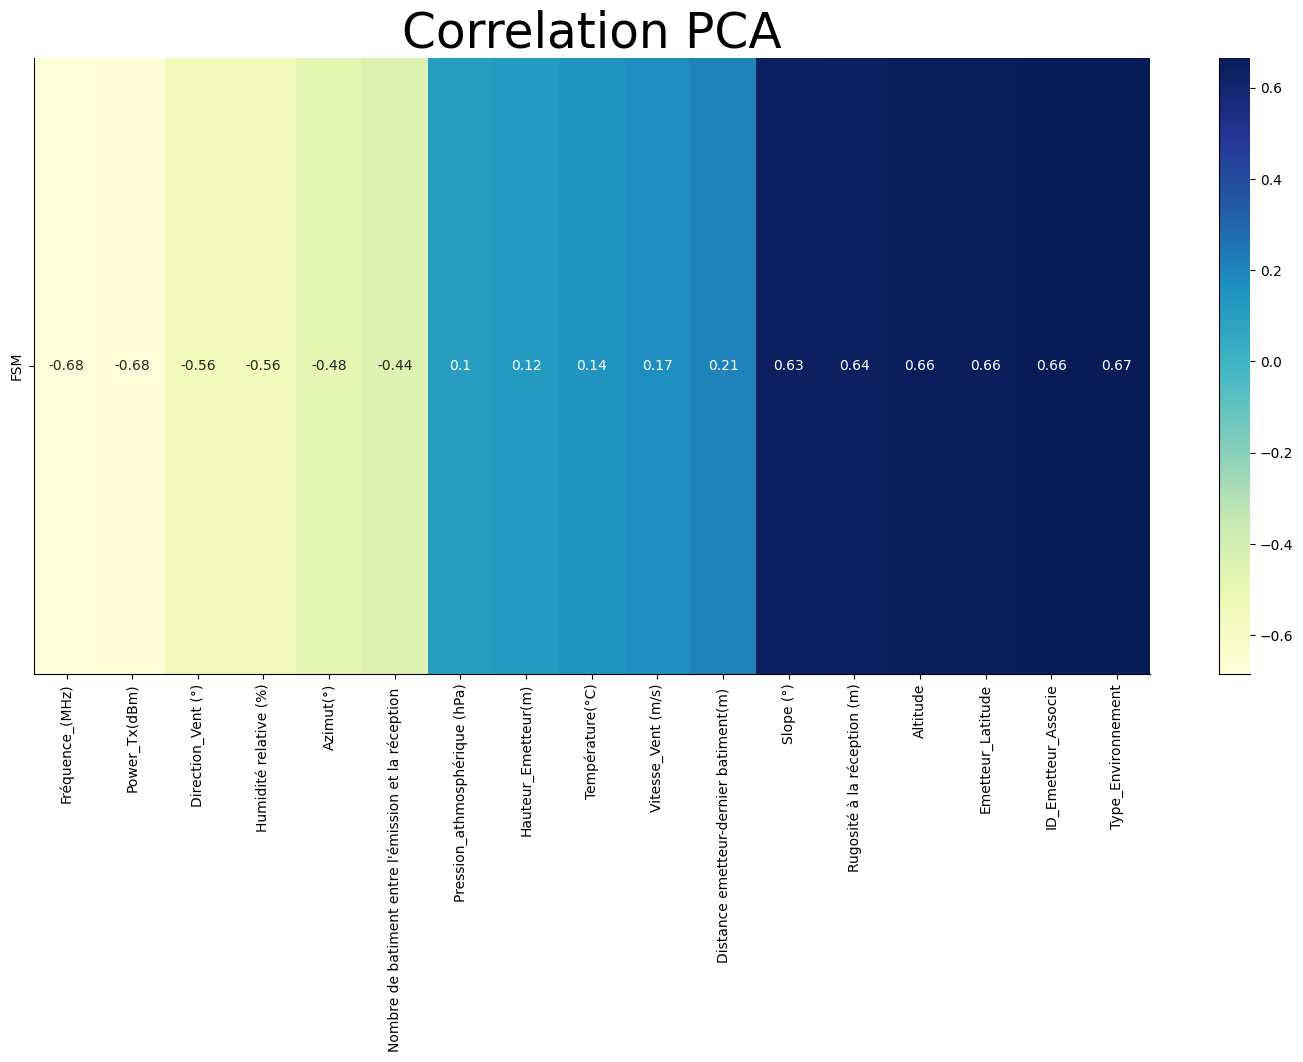

In [ ]:
plt.figure(figsize=(18, 8))
fsm_corr = Data_pca_unique.corr(numeric_only=True)['FSM'].drop('FSM').sort_values()

sns.heatmap(fsm_corr.to_frame().T, cmap="YlGnBu", annot=True)
plt.title("Correlation PCA", fontsize=35)
sns.despine()
plt.show()